kaustubh raykar 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
url = "https://raw.githubusercontent.com/alinauman/Polynomial-Regression-on-Salaries-/master/data.csv"
df = pd.read_csv(url,index_col=0)
df

,Level,Salary
Position,,
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


In [52]:
x=df.Level.values
y=df.Salary.values

In [53]:
x


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [54]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [55]:
#reshaping 
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [56]:
#try linear regression before

In [57]:
# we import linear regression model 

#instantiate the linear regression object 
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

#train the model using trainig datasets 
ln.fit(x,y)

#predict the test data(here we will only send x )
y_pred= ln.predict(x)

In [58]:
#predicting sales values , based on the x values already given
ln.predict(x)

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [59]:
#calcute the print root mean square (PMSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,y_pred) 
rase = np.sqrt(mse) 
print("MSE value: {:.4f}".format(rase))

MSE value: 163388.7352


In [60]:
#r2 , the value more closer to 1 , the better
from sklearn.metrics import r2_score 
print("r2 score value: {:.4f}".format(r2_score(y,y_pred)))

r2 score value: 0.6690


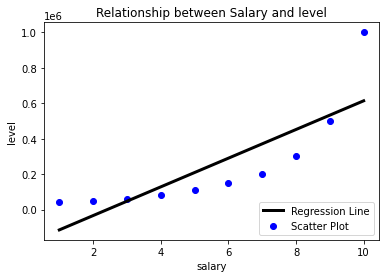

In [61]:
plt.scatter(x,y, color = 'blue', label='Scatter Plot')
plt.plot(x,y_pred, color="black", linewidth=3, label='Regression Line') 
plt.title('Relationship between Salary and level')
plt.xlabel('salary') 
plt.ylabel('level')
plt.legend(loc=4)
plt.show()

##polynomial regression

"polynomial feature is a model which converts your data into the polynomial format "

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures (degree=3)
x_poly= poly_reg.fit_transform(x)

In [74]:
x


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [75]:
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [76]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [77]:
ln2=LinearRegression()
ln2.fit(x_poly,y)
y_pred2=ln2.predict(x_poly)

In [78]:
#predicting sales values , based on the x values already given
ln2.predict(x_poly)

array([[ 14902.0979021 ],
       [ 78759.9067599 ],
       [ 94960.37296037],
       [ 88223.77622377],
       [ 83270.39627039],
       [104820.51282051],
       [177594.40559441],
       [326312.35431236],
       [575694.63869464],
       [950461.53846154]])

In [79]:
#calcute the print root mean square (PMSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,y_pred2) 
rase = np.sqrt(mse) 
print("MSE value: {:.4f}".format(rase))

MSE value: 38931.5040


In [97]:
#r2 , the value more closer to 1 , the better
from sklearn.metrics import r2_score 
print("r2 score value: {:.4f}".format(r2_score(y,y_pred2)))

r2 score value: 0.9812


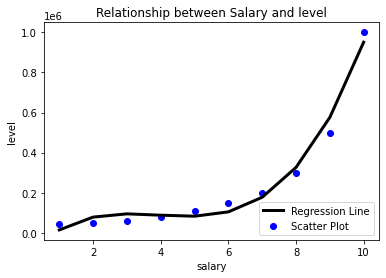

In [98]:
plt.scatter(x,y, color = 'blue', label='Scatter Plot')
plt.plot(x,y_pred2, color="black", linewidth=3, label='Regression Line') 
plt.title('Relationship between Salary and level')
plt.xlabel('salary') 
plt.ylabel('level')
plt.legend(loc=4)
plt.show()

In [99]:
#actual vs predicted values by the model
#ln_diff = pd.DataFrame(({'Actual value': y_pred, 'Predicted value': y_pred2}))
#ln_diff

In [100]:
ln.predict([[6.5]])

array([[330378.78787879]])

In [101]:
ln2.predict(poly_reg.fit_transform([[7.5]]))

array([[240915.35547786]])